<h2> Artificial Intelligence: Coursework 1</h2>

<h3>The Universal Workflow of Machine Learning</h3>

<h4> The steps in the universal workflow are as follows: </h4>

<ol>
  <li>Defining the problem and assembling a dataset</li>
  <li>Choosing the measure of success </li>
  <li>Deciding on an evaluation protocol</li> 
  <li>Preparing the dataset</li> 
  <li>Developing a model that does better than a baseline</li> 
  <li>Scaling up: developing a model that overfits</li> 
  <li>Regularising the overfitting model and tuning the  hyperparameters</li> 
  <li>Retraining the network with the entire training set and evaluating on the unseen test set</li>                     
</ol>


<h3> Defining the problem and assembling a dataset </h3>
    
<br>Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 samples and a test set of 10,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes. The problem we are trying to solve here is to classify these images into their 10 categories, being this a multiclass, single-label classification problem. keep in mind that, in machine learning, a category in a classification problem is called a class. Data points are called samples. The class associated with a specific sample is called a label.</br>

<br>The Fashion MNIST dataset comes preloaded in Keras.</br>

<br>The images are enconded as Numpy arrays, and the labels are an array of integers, ranging from 0 to 9. The images and labels have a one-to-one correspondence.</br>



<table>
  <tr>
    <th>Label</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
  <tr>
    <td>3</td>
      <td>Dress</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


<h4> To be able to move to the next stage, it was hypothesised that: </h4>

<ol>
  <li>The outputs can be predicted given the inputs</li>
  <li>The available data is sufficiently informative to learn the relationship between inputs and outputs </li>
</ol>


<h3>Choosing a measure of success</h3>


<br> Model architecture (number of layers, size of each layer) and layer activation are both arbitrary in Neural Networks. The optimizer and loss function that are given during compilation are also arbitrary. Hyperparameters like the stochastic gradient descent (SGD) learning rate  are not trained, they are tunned. Hyperparameters are the features that we can select. </br>
 
<br> The accuracy, which in this case will be the fraction of images correctly predicted, will be the metric for success. </br> 

<br> We'll use categorical crossentropy for the loss function, which is preferred when each sample belongs to one of multiple classes and is a measure of how well the networks' predictions match what was predicted. The feedback signal utilised for learning is the loss function. During training, the optimizer updates/adjusts the network weights to minimise the loss.</br> 

<br> These two are success indicators because, in general, when deep learning is done appropriately, the loss amount decreases and the accuracy quantity improves. </br> 

<br>Each time the models are tweaked, the loss and accuracy metrics will be assessed to see if the adjustments had a good or negative impact, until the best model is found and applied to the entire test data, and the evaluated.</br>

<h3>Deciding on an evaluation protocol</h3>

<br> The primary idea behind the deep learning workflow is to start with a simple model with a few layers and parameters, then build on top of that until overfitting occurs, then regularise to overcome the overfitting, and keep going until the best model is found.</br>

<br> Progress had to be measured as models are tunned (for example, modifying dropout rates, adding regularisation, number of layers and layer size, model capacity, and so on). We'll utilise Hold-out validation in this model because it's the best option when dealing with large amounts of data. K-Fold validation was investigated as an alternate validation approach, however the Fashion MNIST dataset is large enough and K-fold validation is more commonly used if little data is avalaible and, then  Validation and test sets may contain too few samples to be statistically representative of the data at hand.</br>

<br> We shouldn't tweak the model depending on the test set to avoid information leaks, hence we need also set aside a validation set. Setting aside a portion of the training set as the validation set, training on the remaining data, and then evaluating on the validation set. In the test set, we just evaluate our model once.</br> 

<br> The validation set is made up of the first 10,000 samples from the training set, while the partial training set is made up of the remaining 50,000 samples from the training set. </br> 


<h3>Preparing the dataset</h3>

<br> We must first format our data in such a way that it can be fed into the network before we can begin training our model. </br>

<h4> Vectorization and Normalization </h4>

<br> In a neural network, all inputs and targets must be tensors of floating-point data or, in some special circumstances, tensors of integers. You must first convert whatever data you want to process into tensors, whether it's images, sound, or text.  Vectorization is the term for this process. 
In general, feeding data with huge values into a neural network is not a good idea. Weights and bias parameters are initialised with small values to avoid training being dominated by a few large inputs. It's also risky to have data that's heterogeneous, meaning that distinct attributes have varying ranges of values. If the data is homogeneous and constrained, gradient descent works better.Given this, data should have modest values, such as [-1,1] or [0,1], and all features should have values in the same range, a process known as normalisation. </br>
    
<br> Our training and test photos are stored in unit8 arrays of shape (60000, 28, 28) and (10000, 28, 28) with values in the [0,255] interval, respectively. We'll restructure them into float32 1D arrays (vectors) with values between 0 and 1 in the shape (60000, 28 * 28) and (10000, 28 * 28), respectively. </br>

<br> The labels must also be categorically encoded. Each labe will be converted into a ten-element vector with a single non-zero 'hot' entry (one-hot-encoding). </br>


<h4> Missing data </h4>

<br> In some cases, it may be necessary to handle missing values in some circumstances during preprocessing, it is generally safe to input missing values as 0, unless 0 is already a meaningful value. The network will learn that a value of 0 indicates that data is missing and will begin to ignore it. In our dataset, this is not the case. </br>


<h4> Feature engineering </h4>

<br> The technique of leveraging your own understanding of the data and machine-learning algorithm to improve the system's performance by adding hardcode (non-learned) alterations to the data before it enters the model is known as feature engineering. Because neural networks are capable of autonomously identifying usable features from raw data, modern deep learning eliminates the need for most feature engineering. As a result, it's vital to remember that deep-learning models' ability to learn features on their own is dependent on having a large amount of training data, however feature engineering could be effective for small-data issues. We have a large amount of data in our situation, and after vetorization and normalisation, our data is sufficiently well prepared to be trained, thus we don't need to do feature engineering. </br>







<h5> Note: Images typically have three dimensions: height, width and color depht. Although graysclcale images have only a single color channel and could thus be stored in 2D tensors.

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.

assert train_images.shape == (60000, 28, 28) #uint8 Numpy array of grayscale image data with shapes (60000, 28, 28)
assert test_images.shape == (10000, 28, 28) #uint8 Numpy array of grayscale image data with shapes (10000, 28, 28)
assert train_labels.shape == (60000,) #uint8 Numpy array of labels (integers in range 0-9) with shape (60000,) 
assert test_labels.shape == (10000,) #uint8 Numpy array of labels (integers in range 0-9) with shape (10000,) 

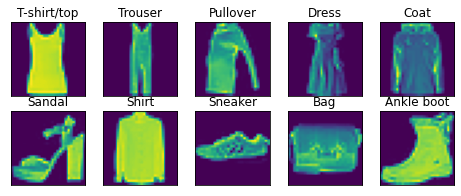

In [2]:
# plotting some random 10 images
import matplotlib.pyplot as plt
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_images[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [3]:
#Preparing the image data

train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#Preparing the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Creating the validation set from the complete training set:

val_images = train_images[:10000]
partial_train_images = train_images[10000:]
val_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:] 

<h3>Developing a model that does better than a baseline</h3>



<br> At this point, the goal is to achieve statistical power, or to create a modest model that can outperform a common sense check. Anything that achieves an accuracy greater than 0.1 in Fashion-MNIST, as well as MNIST, is said to have statistical power. If you can't beat the baseline after trying a variety of feasible architectures, one or more of your original hypotheses were incorrect. </br>

<br> The layer, a data-processing module that can be thought of as a data filter, is the most basic building unit of a neural network. Some data is input, and it is output in a more usable form. In other words, a deep-learning model is similar to a sieve for data processing, consisting of layers of increasingly refined input filters. </br>

<br> Our baseline model will be made up of two Dense layers, which are densely connected neural networks, in order to produce a small capacity model with statistical power. The first layer's activation function will be relu, with 512 hidden units and a 2D tensor with an initial dimension of 784 (28 * 28). Because we're dealing with a multiclass, single-label classification problem, the second and final layer will be a 10-way softmax layer, which will provide an array of ten probability scores that add up to one. The chance that the current image corresponds to one of the 10 classes will be assigned to each score. Softmax is a probability distribution, and the maximum of the outputs, or the highest probability score class, is the forecast.</br>

<br> Weights and biases are used to parametrize layers, which map tensors to tensors. The layer matrix for the dense fully linked layer is n * m, the incoming vector has length m, and the output vector has length  n. The stochastic gradient descent loop updates the weights and biases. A layer performs affine transformations (linear transformations) followed by element-wise function. Non-linearity/activation functions are required to access a much deeper model because affine transformations alone are insufficient for uncrumpling data. </br>

<br> As previously stated, we will use categorical crossentropy for the loss function, which is how the network will be able to judge its performance on training data. For this model, the optimizer will be the rmsprop optimizer and its default rate (0.001), which is the mechanism by which the network will update itself based on data it observes and its loss. Whatever the situation, the rmsprop optimizer is usually a good enough choice. </br>

<h4> We are now ready to train our model, we going to fit the model to its training data </h4>

<br> The batch size is the number of samples processed in a single pass of the training algorithm. </br>
<br> Epochs is the number of complete passes through the entire training set. </br>

<br> The model was given 20 epochs and a batch size of 128, and val_images/val_labels was used as the validation data. </br>


In [4]:
from tensorflow.keras import models, layers

model = models.Sequential() #empty network which is a serie of tranformational layers. Data moves in a single direction
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()

history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels)) 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 59us/sample - loss: 0.6195 - accuracy: 0.7867 - val_loss: 0.4623 - val_accuracy: 0.8397
Epoch 2/20
50000/50000 [==============================] - 2s 45us/sample - loss: 0.4333 - accuracy: 0.8453 - val_loss: 0.4747 - val_accuracy: 0.8414
Epoch 3/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.3825 - accuracy: 0.8611 - val_loss: 0.4288 - val_accuracy: 0.8387
Epoch 4/20
5000

<h4> To build matplotlib graphs, the following code was used to fetch the keys in the dictionary (as the matplotlib graph requires them as inputs). </h4>



In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<h4> The code below was used to create a graph that represents the loss quantity. </h4>

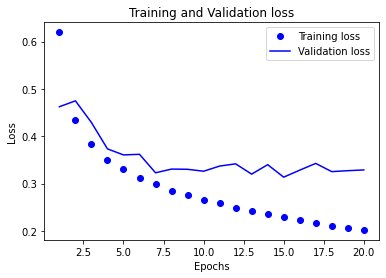

In [6]:
def plot_loss():

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_loss()

<h4> The code below was used to create a graph that represents the accuracy quantity.</h4>

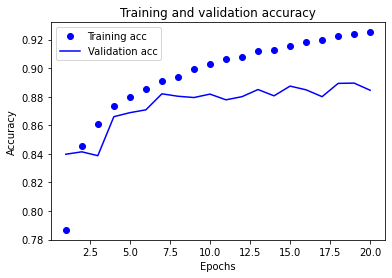

In [7]:
def plot_acc():
    
    plt.clf()
    
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_acc()

<br> There is a significant difference between the first and second dots; this is due to the fact that gradient descent begins with large steps at the beginning of the optimization process and then transitions to small steps as it approaches the optimal combination of parameters for the model in question.</br>

<br> The validation set, which consisted of 10,000 samples from the original training data, was used to test the model against data it had never seen before. With each epoch, the training loss decreased, resulting in a downward trend curve, while the training accuracy rose, resulting in an upward trend curve. When performing gradient descent optimization, this is to be expected. </br> 

<br> This model had the lowest validation loss of 31.36% at 15 epochs and the greatest validation accuracy of 88.95% at 19 epochs. The validation loss curve alternates between steadily  decreases/increases but, in general, it shows a downward trend, despite the variations. The Validation Accuracy curve shows the same trends as the Validation Accuracy curve, but in the opposite direction.</br>

<br>There was some overfitting experienced with the model, although, both the loss and the accuracy plots showed no significant deterioration in validation loss or accuracy. The table below shows the key results of the experiment, such as the number of layers,layer size, among others.The goal of this experiment was to create a model that outperformed the baseline. The experiment was a huge success because the model's accuracy was around 90%, while the baseline was barely 10% in this case. This demonstrated that the model was capable of correctly training the network. <br>

|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2 |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-------      |:--- |:----|:---|:---|-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     | 31.36%       |88.95 %        |

<h3>Scaling up: developing a model that overfits</h3>



<br>The first experiment produced a model with statistical power because it outperformed the baseline of 10% accuracy, but the question is: is the sufficiently powerful? Does it had enough  because layers/parameters to adequately characterise the problem?. We need to do some experiments to check it. The conflict in machine learning is between optimization and generalisation, with the latter determining how well the trained model performs on data it has never seen before. We want good generalisation, but we don't have control over it, therefore we can only adjust the model based on its training data. The optimal model is one that is just on the cusp of overfitting and underfitting, as well as undercapacity and overcapacity.</br> 

<br>The network capacity is simply the number of tunable parameters (weight and bias parameters). A low capacity model will likely underfit training data, whereas a high capacity model runs the danger of learning a perfect mapping from training sample top label that would consequently fail to generalise.</br>

<br>The next step is to build a bigger model (more hidden units, more layers, more epochs, among others) until overfitting be detected, and then adjust the model and implement regularization to eliminate overfitting. 
When a model overfits, it begins to learn patterns that are too particular to the training data, yet are misleading and irrelevant to fresh data.</br>



<h4> Model 2: Add a layer and increase layers size to  512  hidden units <h4>

In [8]:
model = models.Sequential() #empty network which is a serie of tranformational layers. Data moves in a single direction
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', #default lr of 0.001
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels)) 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 143us/sample - loss: 0.5592 - accuracy: 0.7950 - val_loss: 0.4730 - val_accuracy: 0.8246
Epoch 2/20
50000/50000 [==============================] - 7s 131us/sample - loss: 0.3854 - accuracy: 0.8584 - val_loss: 0.4136 - val_accuracy: 0.8484
Epoch 3/20
50000/50000 [====

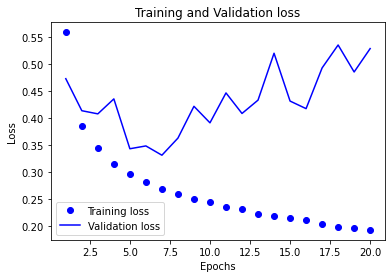

In [9]:
plot_loss()

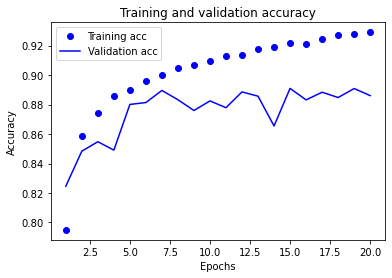

In [10]:
plot_acc()

<br>Having more layers and more hidden units (a higher-dimensional representation space) allows the network to learn more-complex representations, but it makes the network more computationally expensive and may lead to learning unwanted patterns that will improve performance on the training data but not on the test data, as we can see here.<br>


<br> Model 2 had the maximum accuracy of 89.10%, at the last epoch, which was extremely similar to accuracy of the previous one, and the lowest loss of 33.10%.The main difference with this model is it overfitted significantly more than the previous model.<br>


|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2 |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-------      |:--- |:----|:---|:---|-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a |n/a     |33.10%        |89.10%         |
  

<h3>Regularizing the model and tuning the hyperparameters</h3>

<br>Due to the model's noticeable overfitting, regularisation and tuning are required until the optimum model is generated (i.e., the boundary between underfitting and overfitting) and the optimum number of epochs is determined. This can be accomplished in a variety of ways, including:</br>

<ol>
  <li>Add dropout</li>
  <li>Different architectures: add or remove layers </li>
  <li>Add L1 and/or L2 regularisation </li>
  <li>Different hyperparameters such as number of units per layer </li>
</ol>


<h4> Model 3: Less hidden units </h4>

In [11]:
model = models.Sequential() 
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()
history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels)) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 67us/sample - loss: 0.5776 - accuracy: 0.7930 - val_loss: 0.4392 - val_accuracy: 0.8357
Epoch 2/20
50000/50000 [==============================] - 3s 55us/sample - loss: 0.4001 - accuracy: 0.8524 - val_loss: 0.4007 - val_accuracy: 0.8569
Epoch 3/20
50000/50000 [======

<br> Note: the second layer didn't receive an input shape argument, because the it automatically inferred its input shape as being the output shape of the layer that came before. </br>

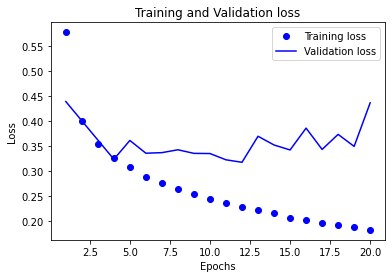

In [12]:
plot_loss()

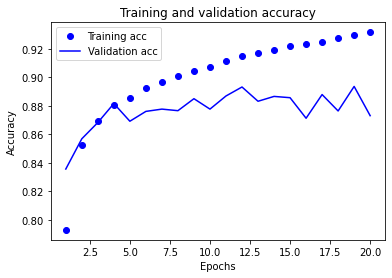

In [13]:
plot_acc()

<br> Giving the layers less hidden units didn't appear to have a significant impact, as the model continued to overfit. So, perhaps it's best to go back to our baseline model (2 layers and the first one with 128 hidden units), which did somewhat better,regarding overfitting, but this time attempt a different ativaction function.</br>

|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2 |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-----------  |:--- |:----|:---|:---|-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a |n/a     |33.10%        |89.10%         |
|3     |20      |3       |128           |0.001|n/a  |n/a |n/a |n/a     |31.78%        | 89.36%        |


<h4> Model 4: Back to the baseline model but change activation function to tanh </h4> 

<br> Instead of relu, we'll use tanh activation, which was popular in the early days of neural networks. </br>

In [14]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(28 * 28, )))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()

history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels)) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 62us/sample - loss: 0.5720 - accuracy: 0.7973 - val_loss: 0.4693 - val_accuracy: 0.8341
Epoch 2/20
50000/50000 [==============================] - 3s 51us/sample - loss: 0.4160 - accuracy: 0.8495 - val_loss: 0.3999 - val_accuracy: 0.8558
Epoch 3/20
50000/50000 [==============================] - 3s 53us/sample - loss: 0.3773 - accuracy: 0.8625 - val_loss: 0.3584 - val_accuracy: 0.8718
Epoch 4/20
50

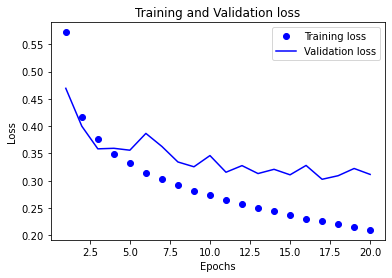

In [15]:
plot_loss()

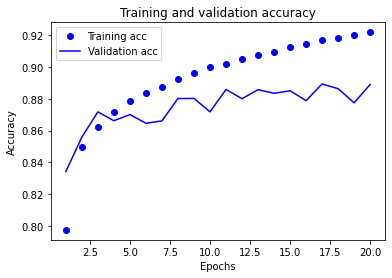

In [16]:
plot_acc()

<br> We'll stick with the relu function because tahn didn't solve the problem of overfitting and didn't outperform the baseline model.</br>


|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2 |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-----------  |:--- |:----|:---|:---|-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a |n/a     |33.10%        |89.10%         |
|3     |20      |3       |128           |0.001|n/a  |n/a |n/a |n/a     |31.78%        | 89.36%        |
|4     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     |30.27%        | 88.94%        |

<h4> Model 5: Keep 'relu' function but add a dropout layer </h4> 

<br> For several neural networks, dropout is one of the most successful and widely used regularisation strategies.  During training, dropout involves arbitrarily drooping out, or setting to zero, a number of the layer's output features.The dropout rate is the fraction of features that are zerout.  It is normally in the range of 0.2 to 0.5. 
The idea behind it is that by introducing noise in the output values of a layer can break up insignificant patterns that the network would start memorising if there was no noise. </br>

In [17]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()

history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels)) 


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 63us/sample - loss: 0.6977 - accuracy: 0.7576 - val_loss: 0.4631 - val_accuracy: 0.8394
Epoch 2/20
50000/50000 [==============================] - 3s 54us/sample - loss: 0.4954 - accuracy: 0.8236 - val_loss: 0.4289 - val_accuracy: 0.8434
Epoch 3/20
50000/50000 [======

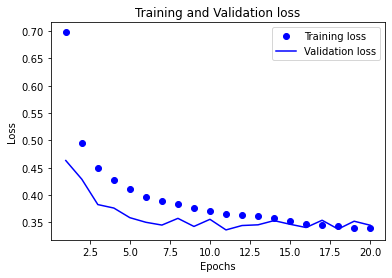

In [18]:
plot_loss()

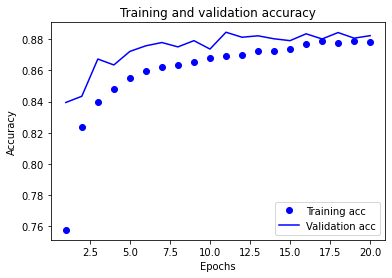

In [19]:
plot_acc()

Overfitting has vanished, and the model now matches much better the data. We got a huge improvment. Now let's work on make it even better, if possible.


|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2 |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-----------  |:--- |:----|:---|:---|-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a |n/a     |33.10%        |89.10%         |
|3     |20      |3       |128           |0.001|n/a  |n/a |n/a |n/a     |31.78%        | 89.36%        |
|4     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     |30.27%        | 88.94%        |
|5     |20      |3       |128           |0.001|n/a  |n/a |n/a |0.5     |33.62%        | 88.45%        |

<h4> Model 6: dropout and increase learning rate to 0.0025 and momentum equal 0.25 </h4>

<br> With SGD, momemtum addresses two issues: convergence speed and local minima (stuck point). Gradient descent works in one direction to find the global minimum (derivative = 0), which is the set of weight values that produces the least loss function feasible. During this process, optimization may become trapped at a local minimum rather than progressing to a global minimum. The parameter W (dot(w,input)+b) is updated by momentum based on both the current gradient (derivative) value and the prior update. </br>

<h4> Let's try a diferent and higher learning rate and add momentum to our network.</h4>


In [20]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.0025,momentum=0.25), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()
history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels)) 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 53us/sample - loss: 0.6763 - accuracy: 0.7578 - val_loss: 0.4623 - val_accuracy: 0.8276
Epoch 2/20
50000/50000 [==============================] - 2s 46us/sample - loss: 0.5143 - accuracy: 0.8158 - val_loss: 0.4188 - val_accuracy: 0.8489
Epoch 3/20
50000/50000 [======

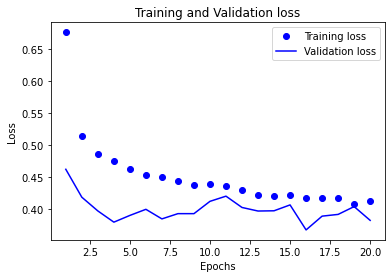

In [21]:
plot_loss()

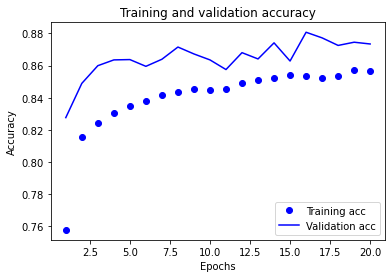

In [22]:
plot_acc()

<br> Large learning rates, on the one hand, result in unstable training due to the slowing of the learning process,  while minuscule rates, on the other hand, result in failure to train. In this case, the learning rate is too high and the model's performance has deteriorated. </br>




|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2 |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-----------  |:--- |:----|:---|:---|-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a |n/a     |33.10%        |89.10%         |
|3     |20      |3       |128           |0.001|n/a  |n/a |n/a |n/a     |31.78%        | 89.36%        |
|4     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     |30.27%        | 88.94%        |
|5     |20      |3       |128           |0.001|n/a  |n/a |n/a |0.5     |33.62%        | 88.45%        |
|6     |20      |3       |128           |0.025|0.25 |n/a |n/a |0.5     |36.77%        | 88.07%        |

<h4> Model 7: lower lr and lower momentum </h4>

<br>As learning rate and momentum work together , let's diminish both.</br>

In [23]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001,momentum=0.1), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()
history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 54us/sample - loss: 0.6967 - accuracy: 0.7565 - val_loss: 0.4546 - val_accuracy: 0.8377
Epoch 2/20
50000/50000 [==============================] - 2s 47us/sample - loss: 0.4918 - accuracy: 0.8256 - val_loss: 0.4020 - val_accuracy: 0.8552
Epoch 3/20
50000/50000 [======

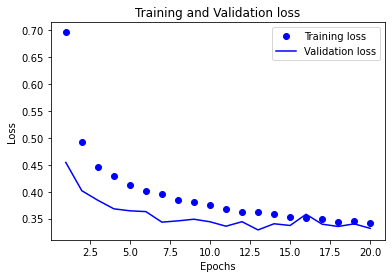

In [24]:
plot_loss()

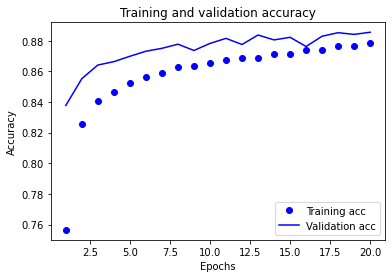

In [25]:
plot_acc()

<br> We prove what was said before. With a learning of 0.001, equal to the default rate of baseline model, and a lower momemtum, our model performed better.</br> 

|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2 |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-----------  |:--- |:----|:---|:---|-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a |n/a     |33.10%        |89.10%         |
|3     |20      |3       |128           |0.001|n/a  |n/a |n/a |n/a     |31.78%        | 89.36%        |
|4     |20      |2       |128           |0.001|n/a  |n/a |n/a |n/a     |30.27%        | 88.94%        |
|5     |20      |3       |128           |0.001|n/a  |n/a |n/a |0.5     |33.62%        | 88.45%        |
|6     |20      |3       |128           |0.025|0.25 |n/a |n/a |0.5     |36.77%        | 88.07%        |
|7     |20      |3       |128           |0.001|0.1  |n/a |n/a |0.5     |33.20%        | 88.55%        |

<h4> Model 8: Add l2 regulazer </h4>

<br> In machine learning problems, if you have a choice between two models, one sophisticated and the other much simpler, we should choose the simpler one if the simplest model represents the data as well as the complex model. 
Overfitting is less common with simpler models. If parameters fill a tiny interval near to zero, they are regular.  Large weigh parameters will amplify the noise and the network will be atempt to the noise. A model with smaller parameters is more robust.Putting constraints on a network's complexity by limiting its weights to take more regular values is a frequent approach to avoid overfitiing. This is known as weight regularisation, and it is accomplished by including a cost associated with large weights in the network's loss function.

For obvious reasons, L1 regularisation is more resilient than L2 regularisation. L2 regularization takes the square of the weights, so the cost of outliers present in the data increases exponentially. L1 regularization takes the absolute values of the weights, so the cost only increases linearly. However, in image detection problems, L2 regularisation is more commonly used. </br>

In [26]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001,momentum=0.1), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()
history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (val_images, val_labels))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 65us/sample - loss: 0.8761 - accuracy: 0.7518 - val_loss: 0.6028 - val_accuracy: 0.8290
Epoch 2/20
50000/50000 [==============================] - 3s 56us/sample - loss: 0.6334 - accuracy: 0.8164 - val_loss: 0.5329 - val_accuracy: 0.8481
Epoch 3/20
50000/50000 [======

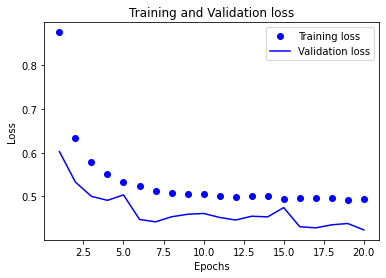

In [27]:
plot_loss()

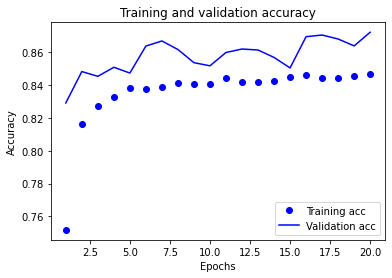

In [28]:
plot_acc()

|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2  |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-----------  |:--- |:----|:---|:--- |-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a  |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a  |n/a     |33.10%        |89.10%         |
|3     |20      |3       |128           |0.001|n/a  |n/a |n/a  |n/a     |31.78%        | 89.36%        |
|4     |20      |2       |128           |0.001|n/a  |n/a |n/a  |n/a     |30.27%        | 88.94%        |
|5     |20      |3       |128           |0.001|n/a  |n/a |n/a  |0.5     |33.62%        | 88.45%        |
|6     |20      |3       |128           |0.025|0.25 |n/a |n/a  |0.5     |36.77%        | 88.07%        |
|7     |20      |3       |128           |0.001|0.1  |n/a |n/a  |0.5     |33.20%        | 88.55%        |
|8     |20      |3       |128           |0.001|0.1  |n/a |0.001|0.5     |43.09%        | 87.20%        |

<br> Adding L2 regularisation to the model made it perform the worst, which is surprising. </br>

<h4> Model 9: Change to batch size 512 </h4>

In [29]:
model = models.Sequential()
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001,momentum=0.1), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()
history = model.fit(partial_train_images, 
                    partial_train_labels,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_images, val_labels))



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 34us/sample - loss: 1.0887 - accuracy: 0.6972 - val_loss: 0.7281 - val_accuracy: 0.8135
Epoch 2/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.7413 - accuracy: 0.7992 - val_loss: 0.6231 - val_accuracy: 0.8259
Epoch 3/20
50000/50000 [======

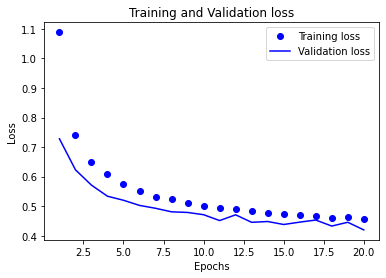

In [30]:
plot_loss()

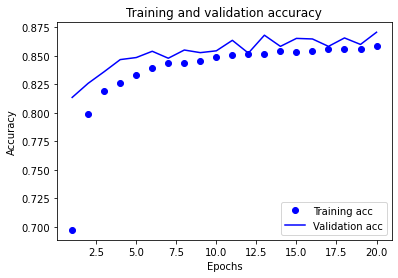

In [31]:
plot_acc()

<br> Increasing the batch size to 512 instead of 128 units really improved the model's performance. This could be linked to the learning rate since it helps regulate learning optimization convergence process. This is also the model that fits better the data.


|Model |Epochs  | Layers | Hidden Units |lr   |mom  |l1  | l2  |dropout | Min.V.Loss   | Max.V.Acc     |
|:-----|:------ |:-------|:-----------  |:--- |:----|:---|:--- |-----   |:-------------|:--------------|
|1     |20      |2       |128           |0.001|n/a  |n/a |n/a  |n/a     | 31.36%       |88.95 %        |
|2     |20      |3       |512           |0.001|n/a  |n/a |n/a  |n/a     |33.10%        |89.10%         |
|3     |20      |3       |128           |0.001|n/a  |n/a |n/a  |n/a     |31.78%        | 89.36%        |
|4     |20      |2       |128           |0.001|n/a  |n/a |n/a  |n/a     |30.27%        | 88.94%        |
|5     |20      |3       |128           |0.001|n/a  |n/a |n/a  |0.5     |33.62%        | 88.45%        |
|6     |20      |3       |128           |0.025|0.25 |n/a |n/a  |0.5     |36.77%        | 88.07%        |
|7     |20      |3       |128           |0.001|0.1  |n/a |n/a  |0.5     |33.20%        | 88.55%        |
|8     |20      |3       |128           |0.001|0.1  |n/a |0.001|0.5     |43.09%        | 87.20%        |
|9     |20      |3       |512           |0.001|0.1  |n/a |0.001|0.5     |41.95%        | 87.07%        |

<h4> Model of choice: Model 5 will be test in a data never seen before and train in all training set (partial + validation)</h4>

<br> The choice of the final model was between model 9 and model 5, however, model 5 is simpler, but as said before,in machine learning problems, if you have a choice between two models, one sophisticated and the other much simpler, we should choose the simpler one if the simplest model represents the data as well as the complex model.</br>  

In [32]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])
model.summary()

model.fit(train_images, train_labels, epochs = 20,batch_size = 128)

results = model.evaluate(test_images, test_labels)

results


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6785 - accuracy: 0.7651
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4797 - accuracy: 0.8308
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4401 - accuracy: 0.8425
Epoch 4/20
60000/60000 [==========

[0.37185988948345183, 0.8765]

<h5> Note: I apologise for having lines before the test set's final accuracy result it shows. As I have already established, there are no issues with the code. This problem is most likely due to the installation of tensorflow I made in Anaconda, as it occurs when I execute the same code in the labs. Unfortunately, couldn't solve this problem.  </h5>

<h3>Conclusion</h3>

<br> Several tests were conducted in order to develop a model capable of predicting image categories from the Fashin MNIST dataset. With each experiment, different models were built in order to find the best model. Increasing the network size, adding new layers, and then resolving overfitting by inserting dropout layers, modifying learning rate, L2 regularisation, and momemtum until the overfitting was drastically decreased were among the iterations. 

<br>The following hypotheses were made:</br>

<ul>
  <li>The outputs can be predicted from the inputs</li>
  <li>The available data is sufficiently informative</li>

</ul>

<br>When the models were used to train the network with the training dataset, the validation accuracy for the bulk of them was nearly 90 percent. For models that did not undergo overfitting, the average validation loss was 37 percent. When the model was tested against an unknown test dataset, the results were consistent, with a 37.18 percent loss and an accuracy of 87.65 percent.</br>

<br>This indicated that the hypotheses were true, that the outputs could be expected from the inputs, and that the data available was adequately informative. This also demonstrated that the evaluation procedure was accurate and reliable for the use case (as the evaluation method did not need to be changed and the hypotheses were proven correct). The results indicated that adding more layers had no effect on accuracy, since the accuracy could not exceed 90% regardless of the number of layers in the model.</br>

<br>Overall, the results were good!</br>

<h4>References </h4>   

<ul>
  <li>Chollet, F. (2018), *Deep Learning with Python*, Shelter Island: Manning.</li>
  <li>Blackwell, T. (2020), *Artificial Intellience Module: Lecture Notes*, London: Goldsmiths,University of London.</li>

</ul>

